In [33]:
import pandas as pd
df=pd.read_csv('/content/train-2.csv')

In [34]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df.shape

(42000, 785)

In [36]:
import matplotlib.pyplot as plt

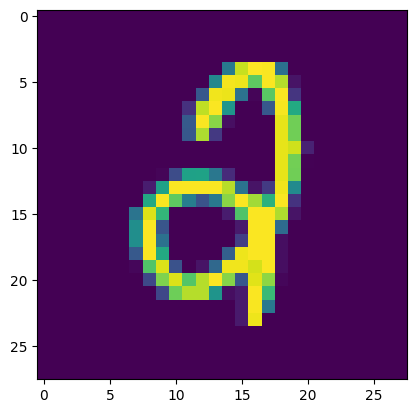

In [37]:
plt.imshow(df.iloc[10000,1:].values.reshape(28,28))

In [38]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
x_train.shape

(33600, 784)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
x_train_cleaned = x_train.dropna()
y_train_cleaned = y_train.loc[x_train_cleaned.index]
knn.fit(x_train_cleaned,y_train_cleaned)

KNeighborsClassifier()

In [42]:
import time
start=time.time()
knn.predict(x_test)
y_pred=knn.predict(x_test)
print(time.time()-start)

40.79489874839783


In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [45]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [46]:
from sklearn.decomposition import PCA
# objects
pca = PCA(n_components=400)

In [47]:
# find eigen vectors and eigen values
x_train_trf = pca.fit_transform(x_train_cleaned)
x_test_trf = pca.transform(x_test)

In [48]:
x_train_trf.shape

(33600, 400)

In [49]:
knn = KNeighborsClassifier()

In [50]:
knn.fit(x_train_trf,y_train_cleaned)

KNeighborsClassifier()

In [51]:
y_pred = knn.predict(x_test_trf)

In [52]:
accuracy_score(y_test,y_pred)

0.10821428571428572